# Сборный проект

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Было бы не плохо добавить план исследования в описание проекта.</font>

### Откройте файл с данными и изучите общую информацию
Путь к файлу: /datasets/games.csv.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

0

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<bound method DataFrame.info of                                 Name Platform  Year_of_Release         Genre  \
0                         Wii Sports      Wii           2006.0        Sports   
1                  Super Mario Bros.      NES           1985.0      Platform   
2                     Mario Kart Wii      Wii           2008.0        Racing   
3                  Wii Sports Resort      Wii           2009.0        Sports   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16711               LMA Manager 2007     X360           2006.0        Sports   
16712        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16713               Spirits & Spells      GBA           2003.0      Platform   
16714            Winning Post 8 2016      PSV           2016.0    Simulation   

       

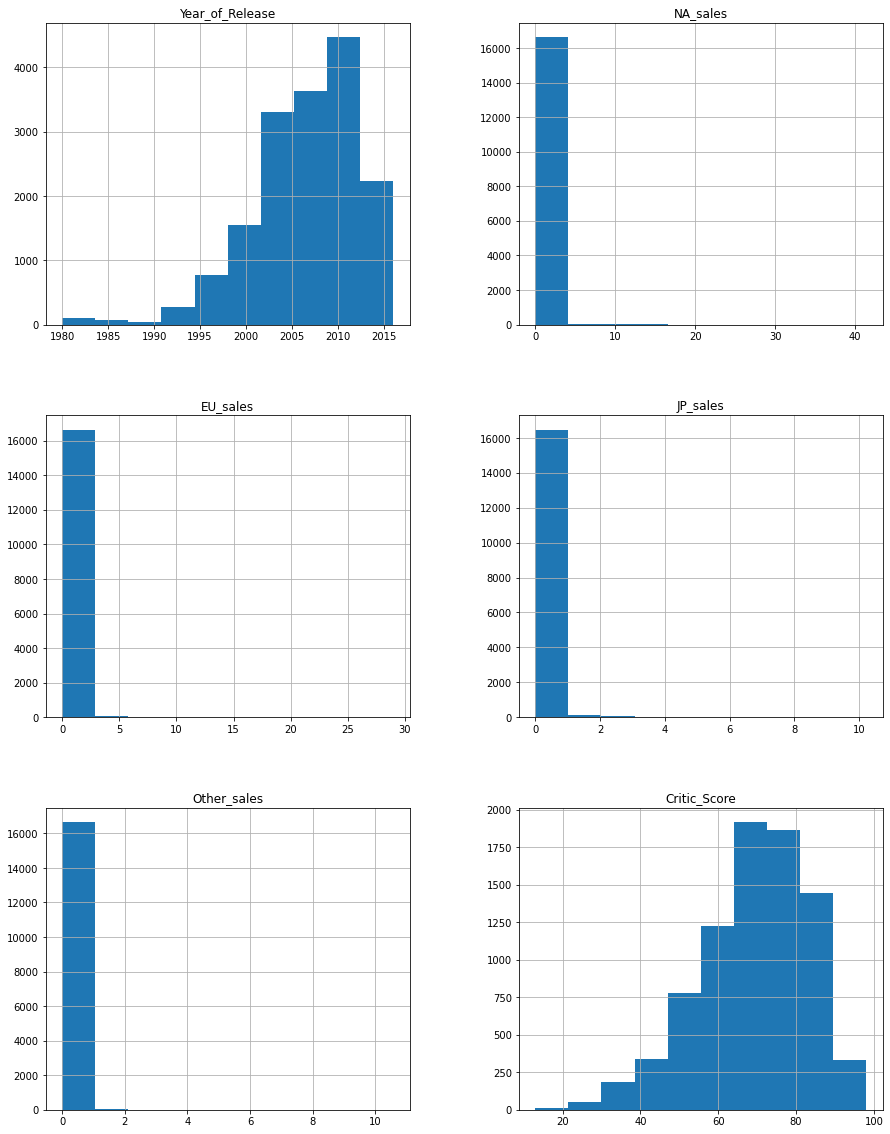

In [3]:
data = pd.read_csv('/datasets/games.csv')
display(data.duplicated().sum())
display(data.head()) 
data.hist(figsize=(15, 20))
data.info

## Подготовьте данные
1. Замените названия столбцов (приведите к нижнему регистру);

In [3]:
data.columns = data.columns.str.lower()
display(data.head(30))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Привели названия столбцов к нижнему регистру.

2. Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;

In [4]:
print(data.dtypes)
data['name'] = data['name'].astype('string')
data['platform'] = data['platform'].astype('string')
data['genre'] = data['genre'].astype('string')
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')
data['rating'] = data['rating'].astype('string')
print('\n Проверяем типы после замены \n')
print(data.dtypes)

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

 Проверяем типы после замены 

name                string
platform            string
year_of_release    float64
genre               string
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              string
dtype: object


Следует поменять тип данных на строчный в столбцах name, platform, genre, rating. Столбец year_of_release следует перевести в int(глд - всегда целое число), но пока пропуски не позволяют этого сделать. Столбец user_score нужно поменять на числовой, так как оценка всегда является числом. 

3. Обработайте пропуски при необходимости:

In [5]:
print(data.isna().sum())
data = data[data['year_of_release'].notna()]
data = data[data['name'].notna()]
data = data[data['genre'].notna()]
data['year_of_release'] = data['year_of_release'].astype('int')
print(data.dtypes)
print(data.isna().sum())
display(data.head(20))

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64
name                string
platform            string
year_of_release      int64
genre               string
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              string
dtype: object
name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,<NA>
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,<NA>
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,<NA>
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,<NA>


4. Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;

Следует убрать из таблицы игры без года выпуска, их всего 269. Теперь можно привести тип столбца с годом к int. Также следует убрать строки без имени и жанра, их всего по 2. Пропуски в графах с оценками и рейтингом пропуски заполнять не стоит, так как их много и они могут сильно повлиять на результат исследования. Всего удалили 273 строки из 16715, что составляет около 1,63%. Это вполне допустимо.

5. Опишите причины, которые могли привести к пропускам;

Вероятные причины пропусков в годах выпуска, имени и жанрах - элементарно некачественно заполненные данных, судя по малому количеству таких строк. Причинами пропусков в графах с оценками и рейтингом, вероятнее всего, является возраст игр. Можно заметить, что большая часть пропусков в этих столбцах у более старых игр. Вероятно, тогда не велся учет общих оценок, также не было рейтинговой комиссии, которая была основана только в 1994 году и не всего категории появились сразу.


6. Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;

Вероятно, аббревиатура "tbd" означает "to be decided", что переводится как "будет определено", то есть значение не посчитано. Значит можно прировнять эти значения к NaN.


In [6]:
display(data['user_score'].unique())
display(data['platform'].unique())

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

<StringArray>
[ 'Wii',  'NES',   'GB',   'DS', 'X360',  'PS3',  'PS2', 'SNES',  'GBA',
  'PS4',  '3DS',  'N64',   'PS',   'XB',   'PC', '2600',  'PSP', 'XOne',
 'WiiU',   'GC',  'GEN',   'DC',  'PSV',  'SAT',  'SCD',   'WS',   'NG',
 'TG16',  '3DO',   'GG', 'PCFX']
Length: 31, dtype: string

7. Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [7]:
data['sum_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data['rating'] = data['rating'].fillna('unrated')
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unrated,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unrated,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,unrated,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,unrated,28.31


In [8]:
# Комментарий ревьюера
# Посмотрим, что у нас осталось
temp = data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  string 
 1   platform         16444 non-null  string 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  string 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  string 
 11  sum_sales        16444 non-null  float64
dtypes: float64(7), int64(1), string(4)
memory usage: 1.6 MB
None
-------------------------
name <StringArray>
[                        ' Beyblade Burst',
                      ' Fire Emblem Fates',
                   " Frozen: Olaf's Quest",
    

## Проведите исследовательский анализ данных

1. Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64


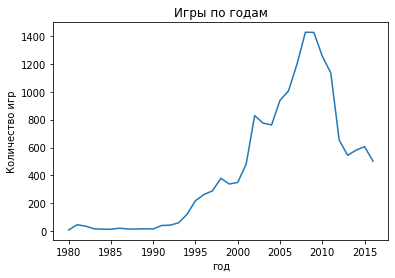

In [9]:
games_year = data.groupby('year_of_release')['name'].count()
print(games_year)
games_year.plot()
plt.title('Игры по годам')
plt.xlabel('год')
plt.ylabel('Количество игр')
plt.show()

Можно увидеть, что до 1991 года игры выходили намного реже. Также после 2010 наступил спад.

2. Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

platform  year_of_release
2600      1980                9
          1981               46
          1982               36
          1983               11
          1984                1
Name: name, dtype: int64
platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: sum_sales, dtype: float64


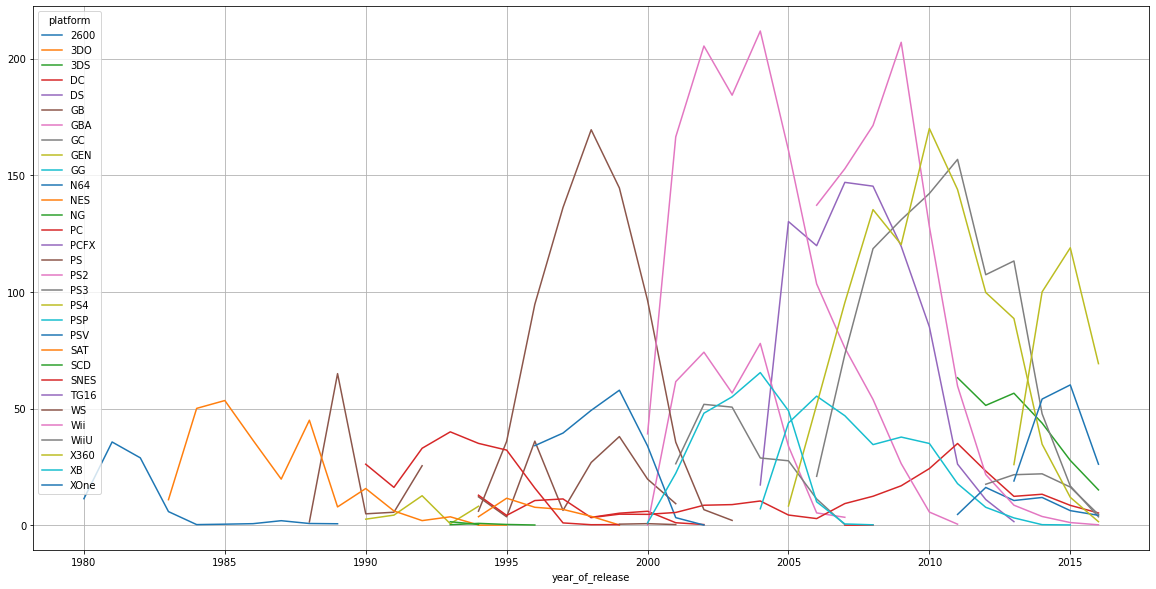

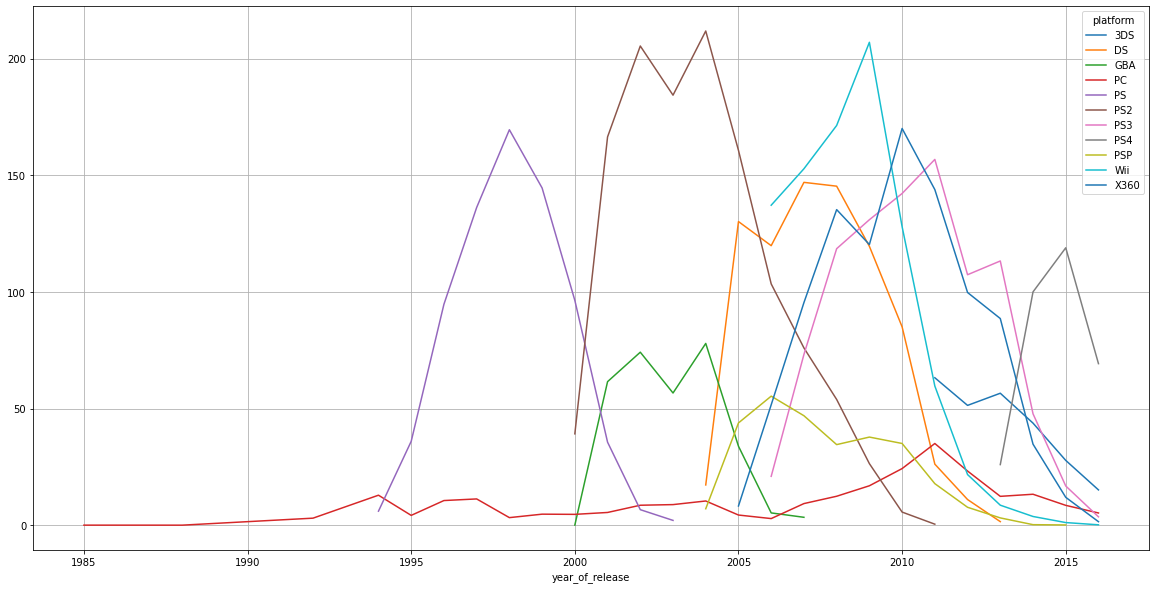

In [10]:
games_year_platform = data.groupby(['platform', 'year_of_release'])['name'].count()
print(games_year_platform.head())
data.pivot_table(index='year_of_release', columns = 'platform', values='sum_sales', aggfunc='sum').plot(grid=True, figsize=(20, 10))
best_platforms = data.groupby('platform')['sum_sales'].sum().sort_values(ascending=False)
print(best_platforms)
plt.show()
data_best = data.query("platform == ['PS2', 'X360','PS3','Wii','DS','PS','PS4','GBA','PSP','3DS','PC']")
data_best.pivot_table(index='year_of_release', columns = 'platform', values='sum_sales', aggfunc='sum').plot(grid=True, figsize=(20, 10))
plt.show()

Мы определили платформы с самым большим объемом продаж и построили по ним график продаж от года. Видно, что у каждой платформы есть пик продаж в 1-2 года, пик наступает в среднем на 2-3 год после появления. В целом, цикл жизни платформы обычно 7-10 лет и в последние 20 лет их становится все больше. Каждые 1-3 года появляется новая платформа. В целом, продажи видеоигр бытро росли с 90-х годов, достигнув пика в 00-х. В 10-ых наблюдается некоторый спад. На пик платформа выходит за 3-4 года.

3. Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
4. Не учитывайте в работе данные за предыдущие годы.
5. Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

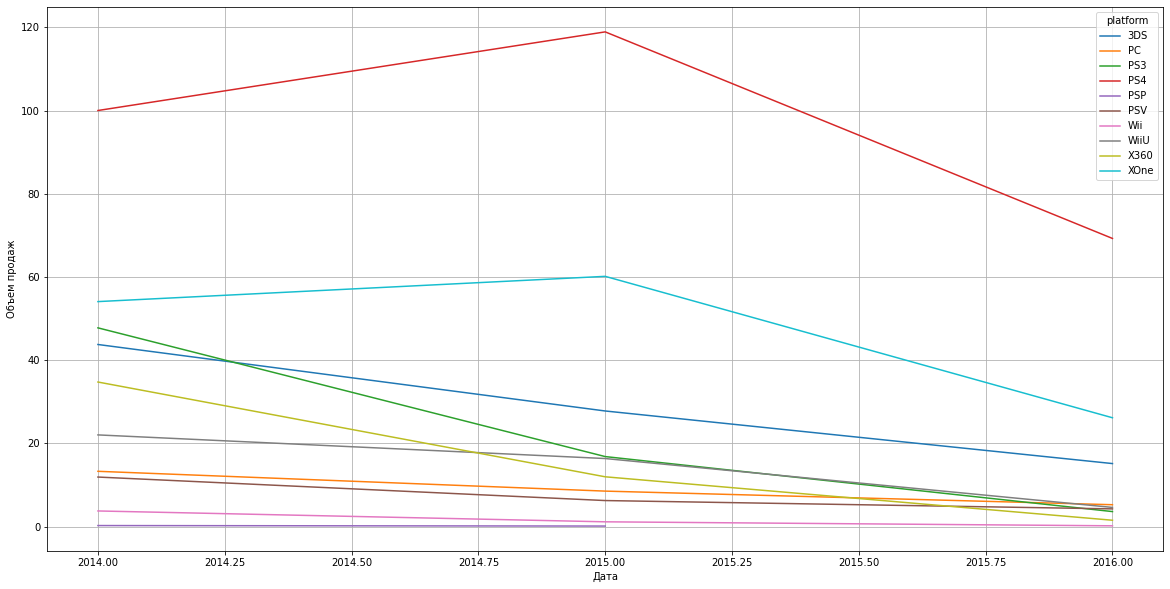

In [11]:
data_base = data
data = data.query("year_of_release >= 2014 and year_of_release <= 2016")
data.pivot_table(index='year_of_release', columns = 'platform', values='sum_sales', aggfunc='sum').plot(grid=True, figsize=(20, 10))
plt.xlabel('Дата')
plt.ylabel('Объем продаж')
plt.show()

Учитывая, что нужен проноз на 2017 год, разумно взять период 2014-2016гг, учитывая средний возраст жизни платформ. Выявилось 3 основные платформы - PS4, XOne и 3DS. Относительно 14 года, по всем из них к 2016 случился спад. При этом, у ПС4 и Хбокс1 в 2015 году был пик. В целом, только они являются потенциально прибыльными к 2016 году, хотя их популярность также снижается.

6. Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

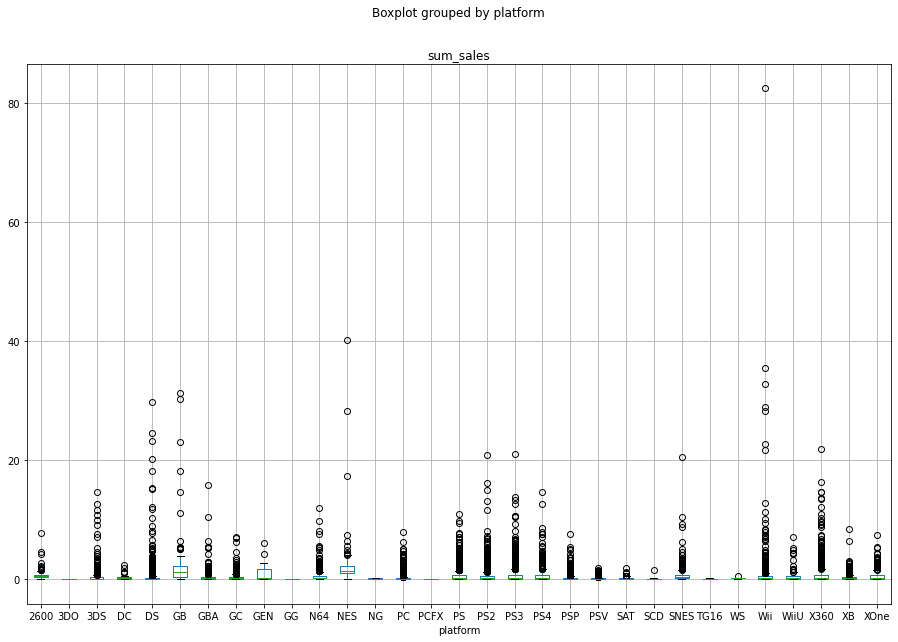

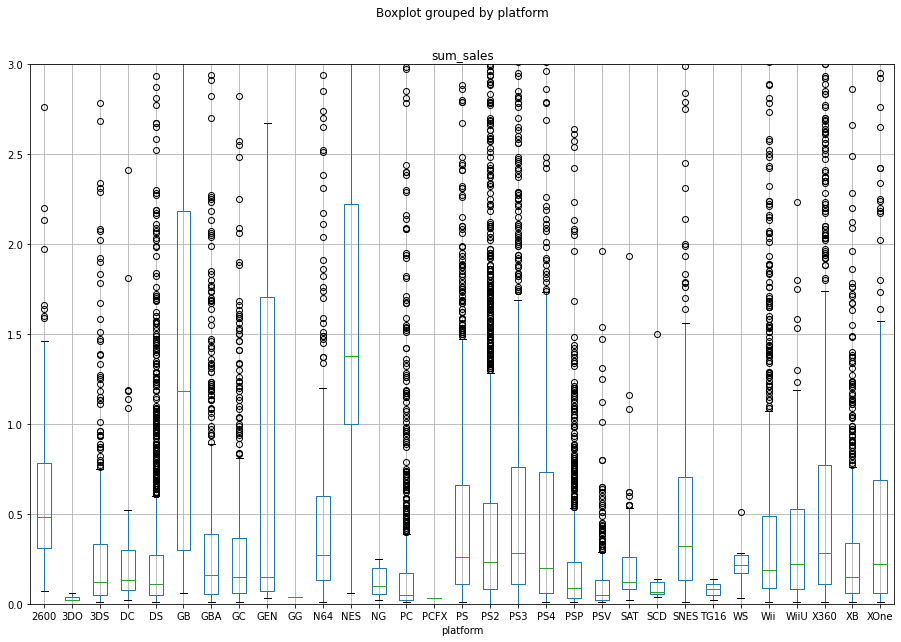

           count      mean       std   min     25%    50%     75%    max
platform                                                                
2600       116.0  0.745517  0.956160  0.07  0.3075  0.480  0.7800   7.81
3DO          3.0  0.033333  0.023094  0.02  0.0200  0.020  0.0400   0.06
3DS        512.0  0.503535  1.441271  0.01  0.0500  0.120  0.3325  14.60
DC          52.0  0.306731  0.468660  0.02  0.0775  0.135  0.2975   2.41
DS        2121.0  0.378491  1.436042  0.01  0.0500  0.110  0.2700  29.80
GB          97.0  2.622990  5.390925  0.06  0.3000  1.180  2.1800  31.38
GBA        811.0  0.385795  0.899654  0.01  0.0550  0.160  0.3900  15.84
GC         542.0  0.362970  0.693974  0.01  0.0600  0.150  0.3675   7.06
GEN         27.0  1.050000  1.490041  0.03  0.0700  0.150  1.7050   6.02
GG           1.0  0.040000       NaN  0.04  0.0400  0.040  0.0400   0.04
N64        316.0  0.689905  1.322189  0.01  0.1300  0.270  0.6000  11.90
NES         98.0  2.561735  5.108012  0.06  1.0000 

In [12]:
data = data.query("platform == 'PS4' or platform == 'XOne' or platform == '3DS'")
data_base.boxplot(column='sum_sales', by='platform', figsize=(15,10))
plt.show()
data_base.boxplot(column='sum_sales', by='platform', figsize=(15,10))
plt.ylim(0, 3)
plt.show()
print(data_base.groupby('platform')['sum_sales'].describe())

Видно, что самые продаваемые, в среднем, игры выпускались на PS, у нее самое высокое среднее и медианное значение продаж, хотя общая доля игра на эту платформу в базе небольшое. При этом у каждой из платформ есть выбросы, больше всего выделяется WII, у которой самое большое (с большим отрывом) стандартное отклонение, одно из самых больших средних значений продаж, но при этом медианное значение достаточно среднее. Скорее всего, на эту платформу было несколько очень значимых хитов, которые влияют на общую статистику в значительной степени.Вероятно, это какие-то очень популярные игры-бестеллеры. На втором месте по медианным продажам PS3, при этом по средним продажам она также в лидерах. Количество игр на эту платформу значительное, более, чем в 5 раз выше, чем у PS. Удивительно, но самыми низкими средним и медианным значениями продаж, причем со значительным отрывом, обладает PC. Вероятно, это связано с пиратством и доступность бесплатного контента.

7. Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы. 
8. Соотнесите выводы с продажами игр на других платформах.

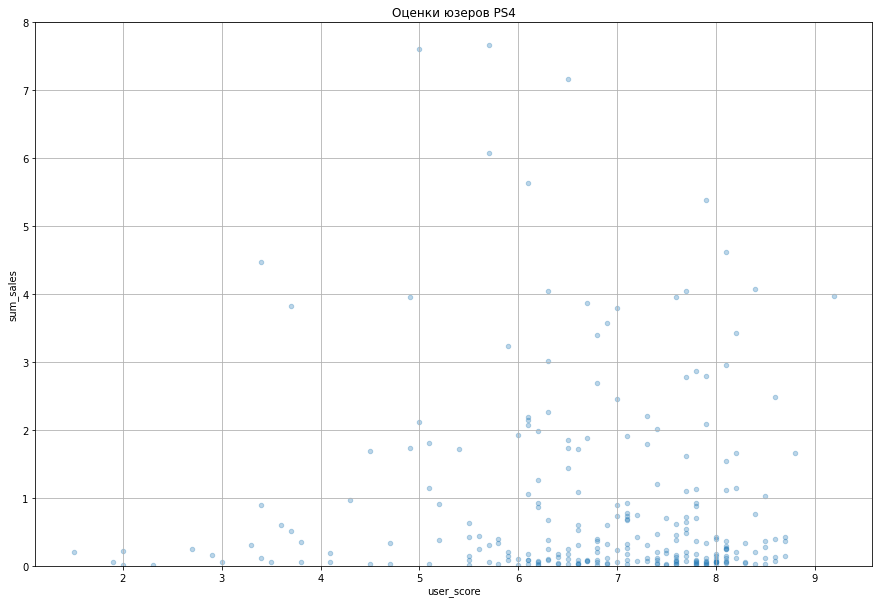

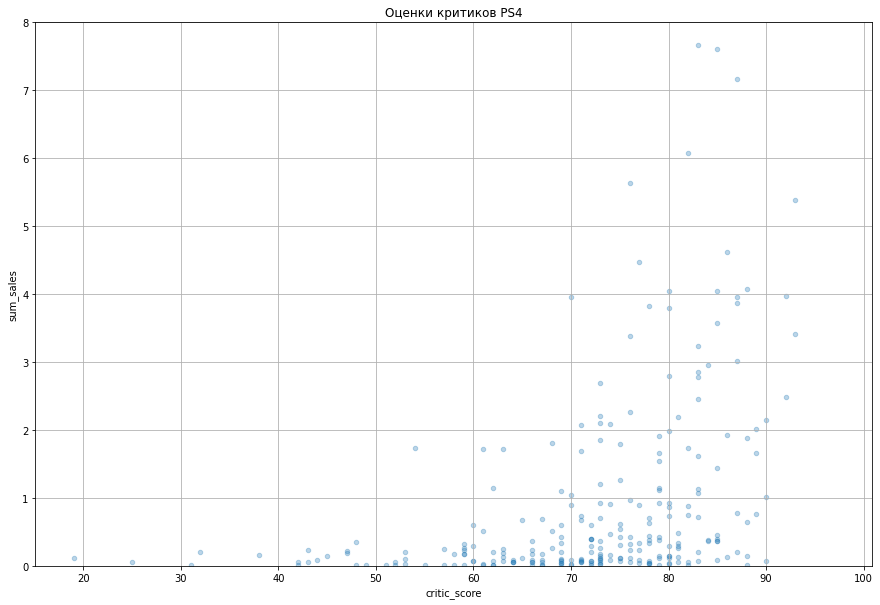

-0.031957110204556376
0.40656790206178095


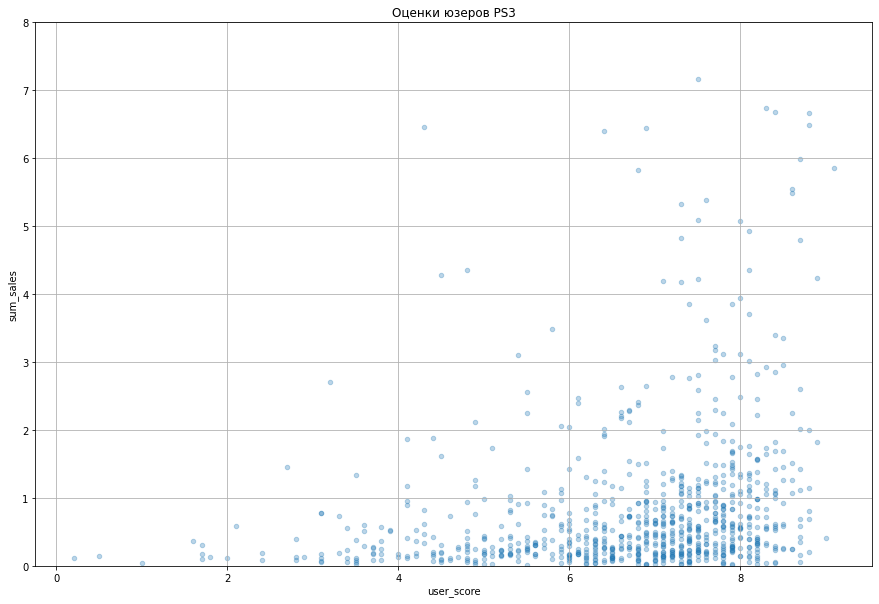

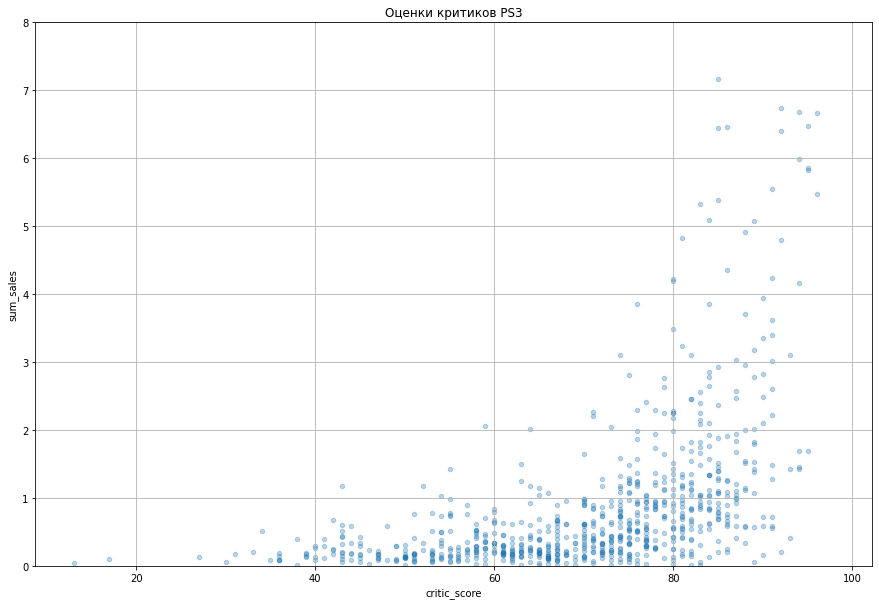

0.12841562938563006
0.4327589578997135


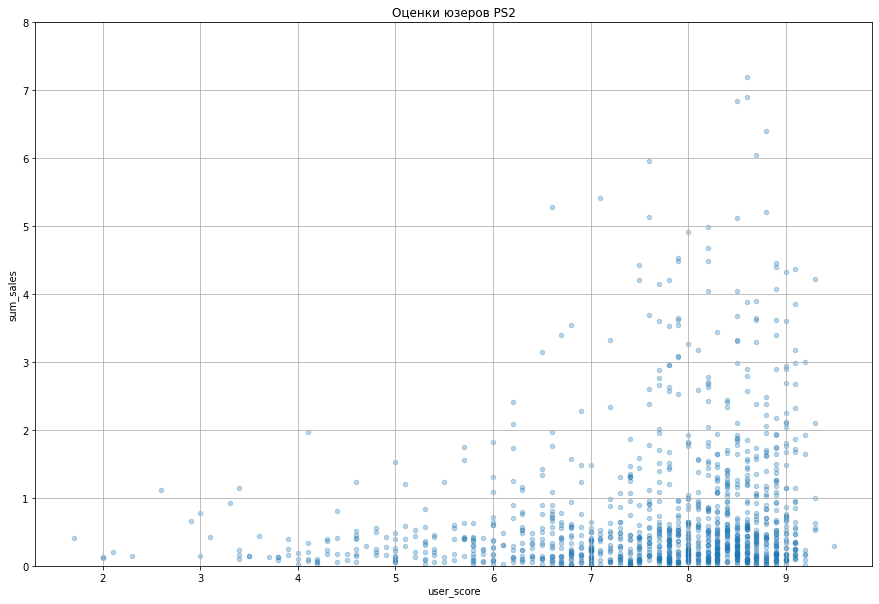

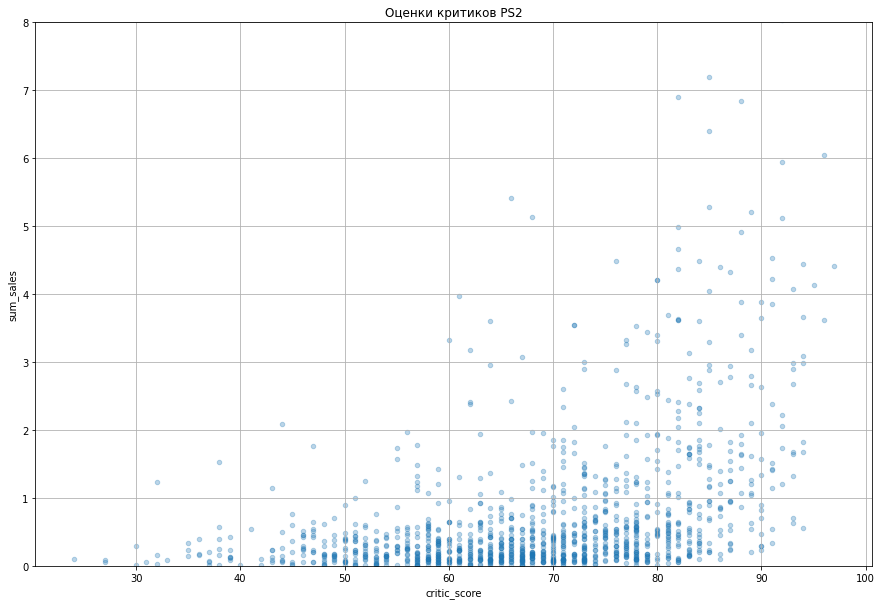

0.1750550277038374
0.39253647544509007


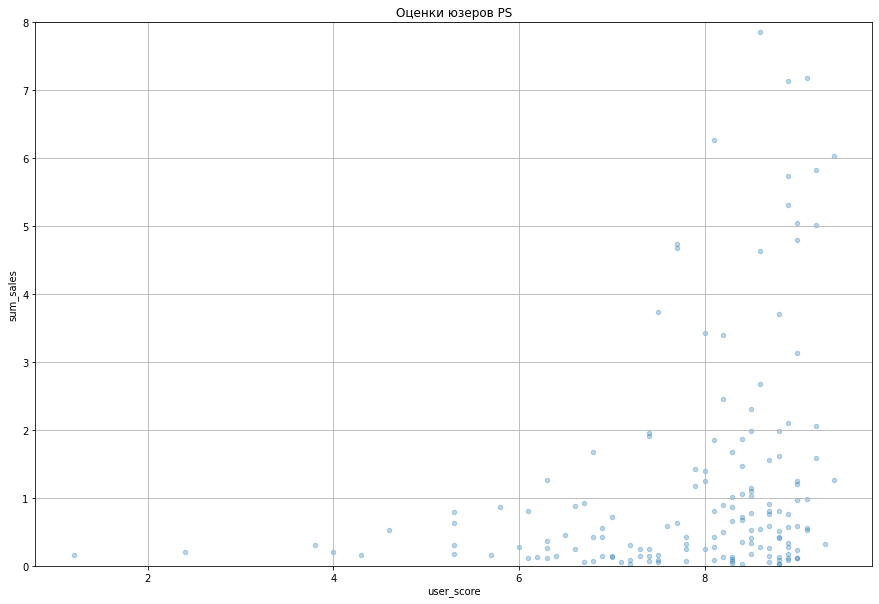

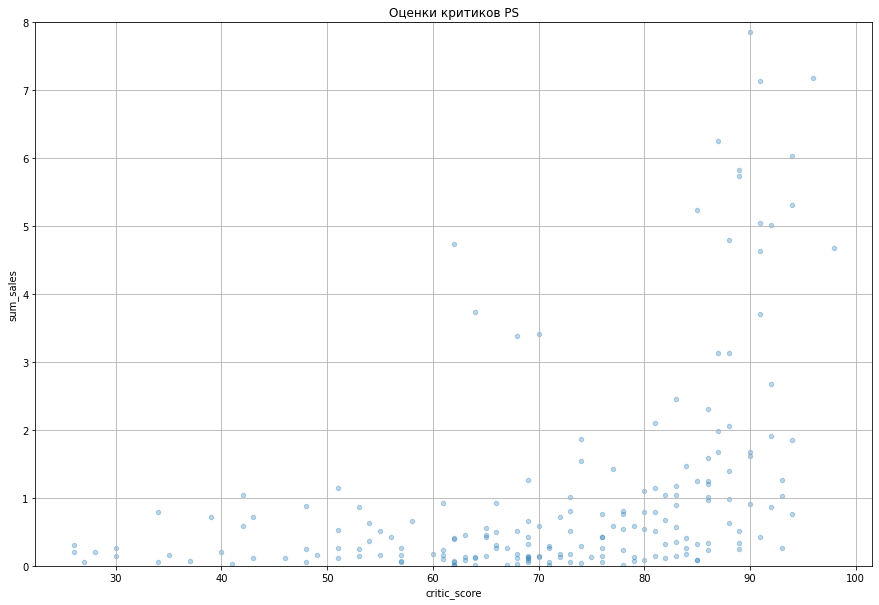

0.30007753534409365
0.4466897788670505


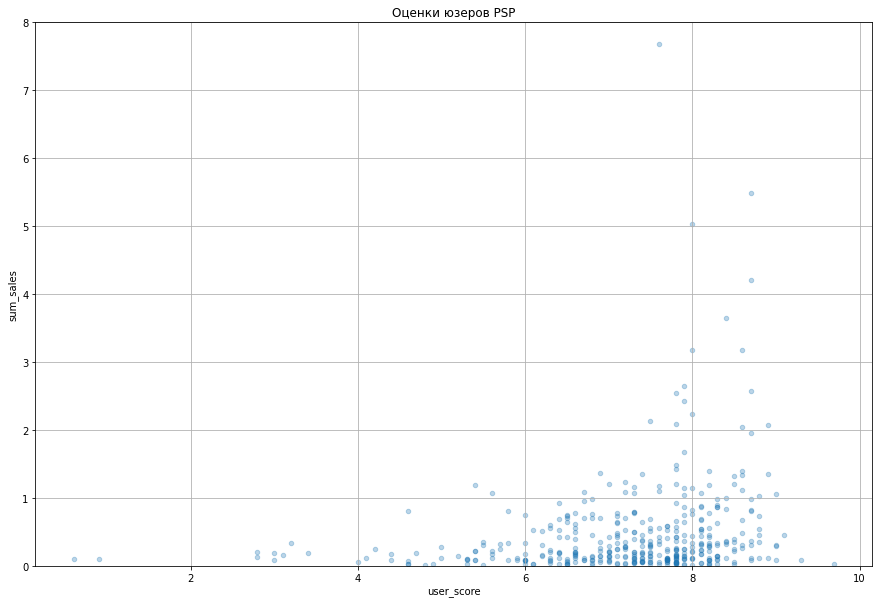

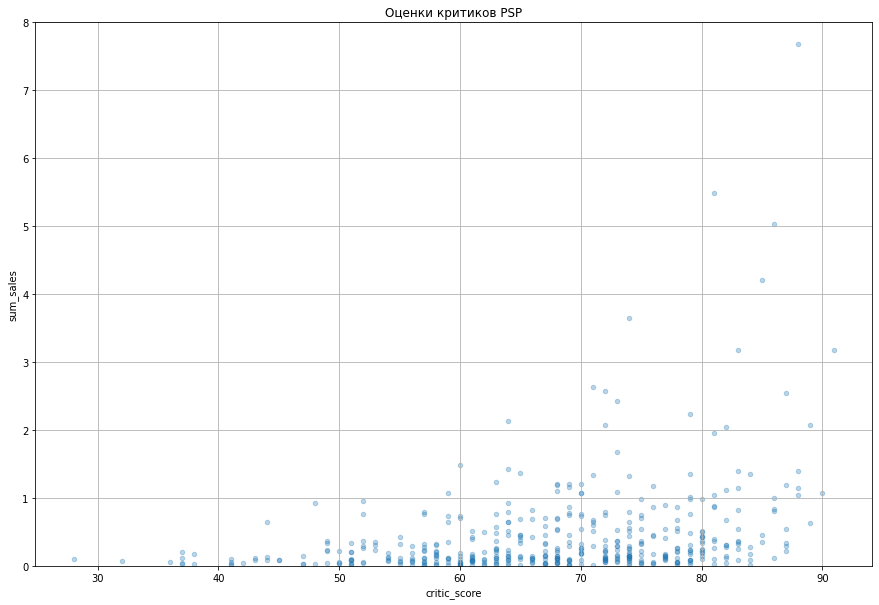

0.22089026723044386
0.31752451005134863


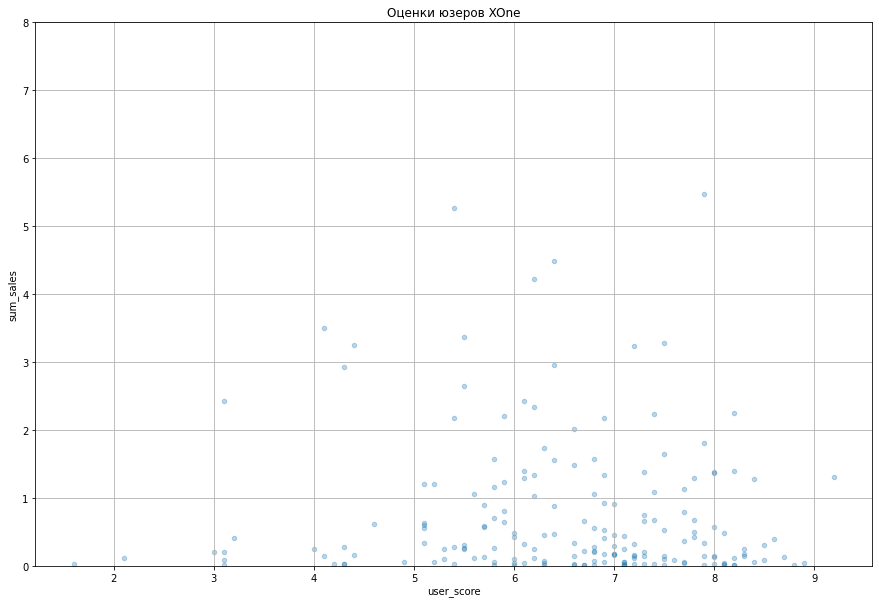

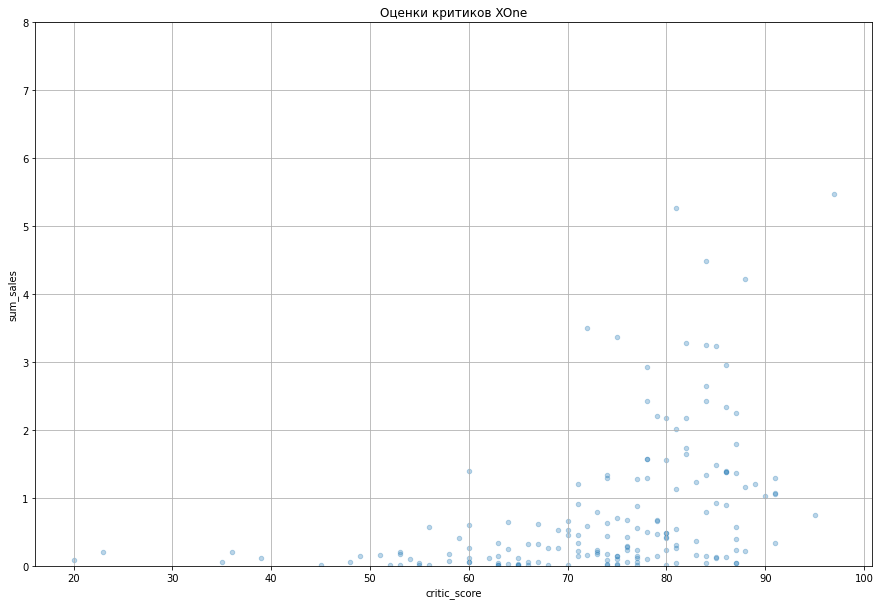

-0.06892505328279414
0.4169983280084017


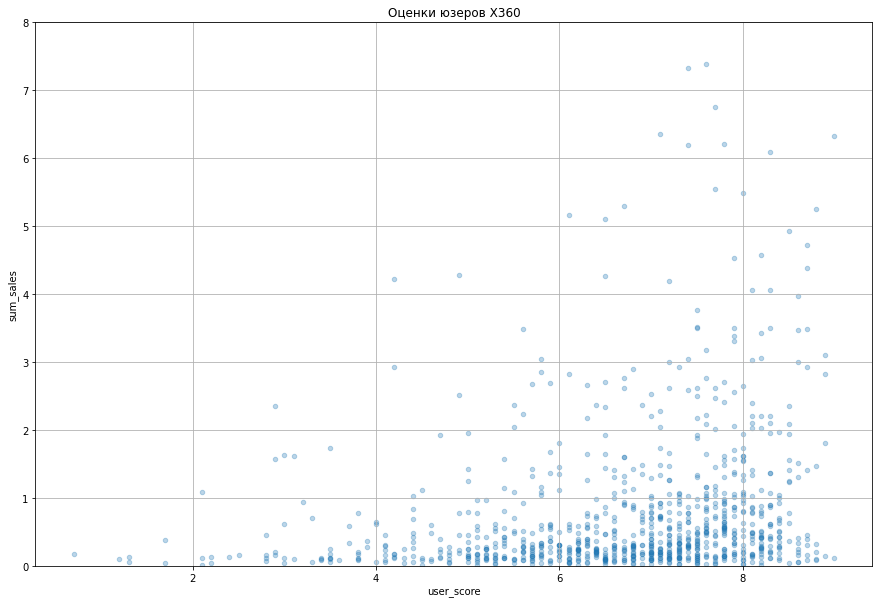

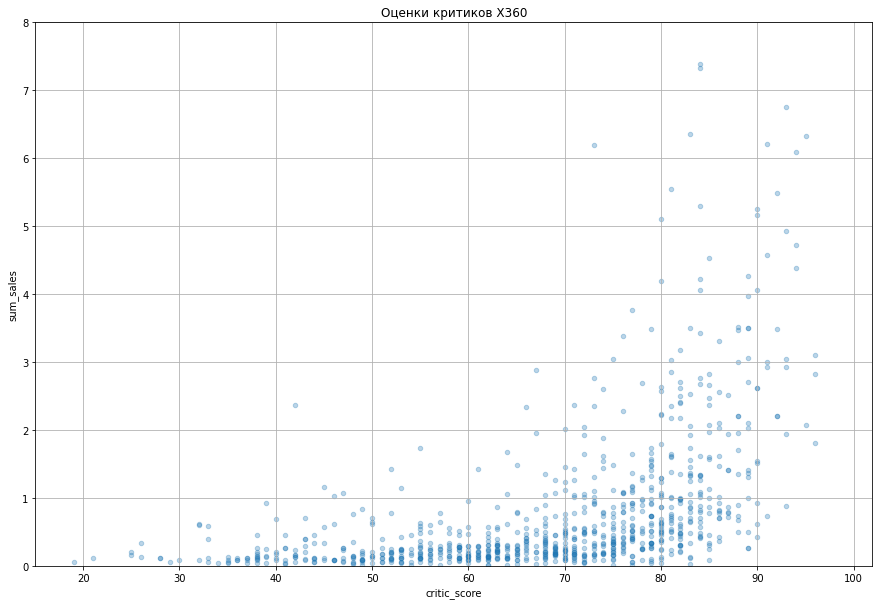

0.11418661214018049
0.39286589254006954


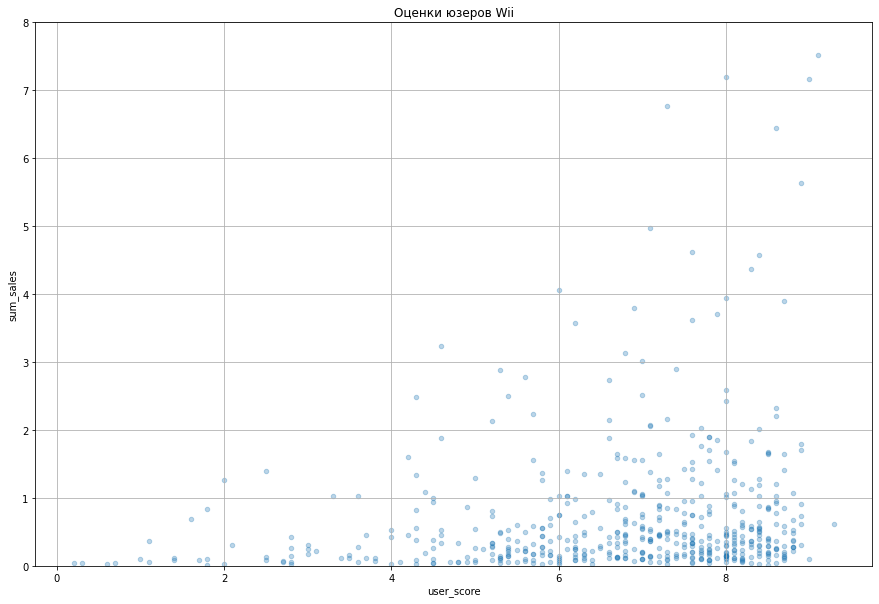

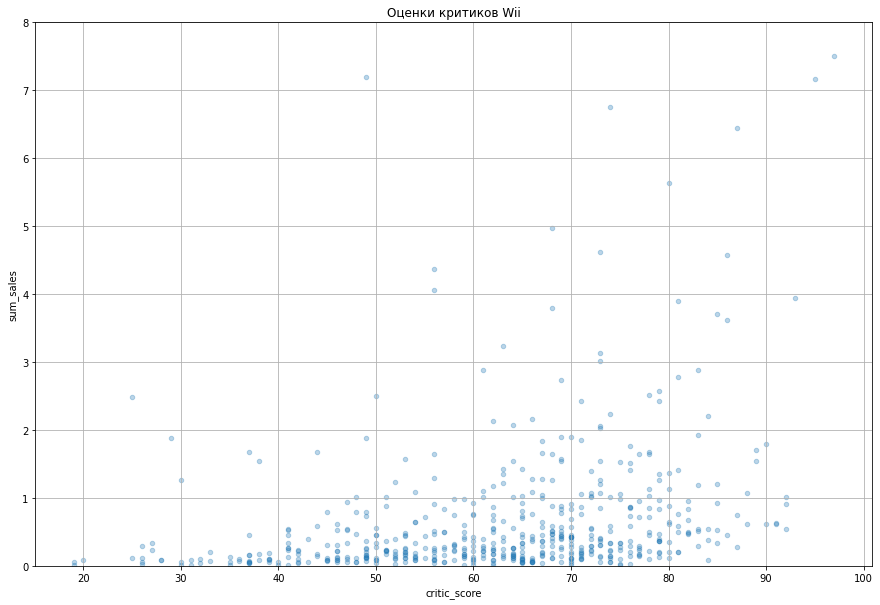

0.11283121360773772
0.17790728577594908


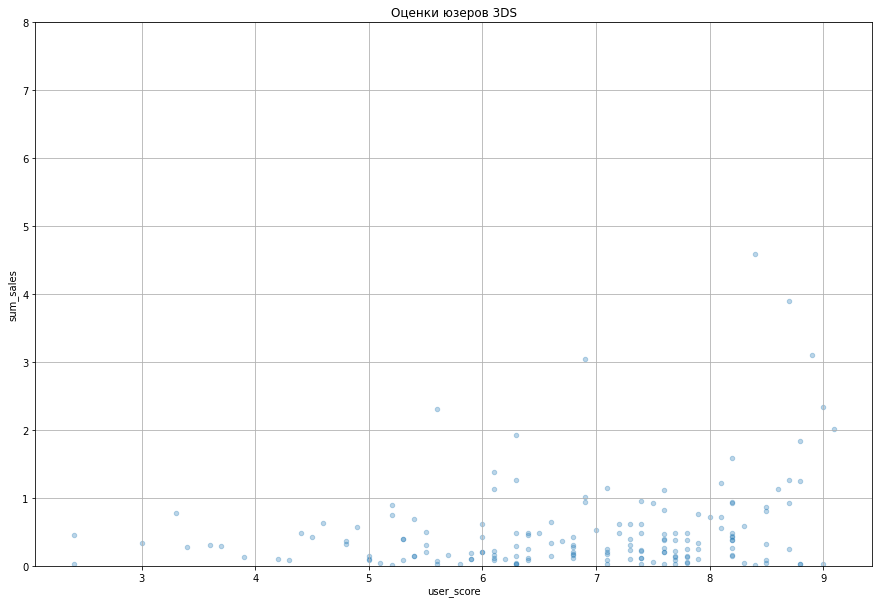

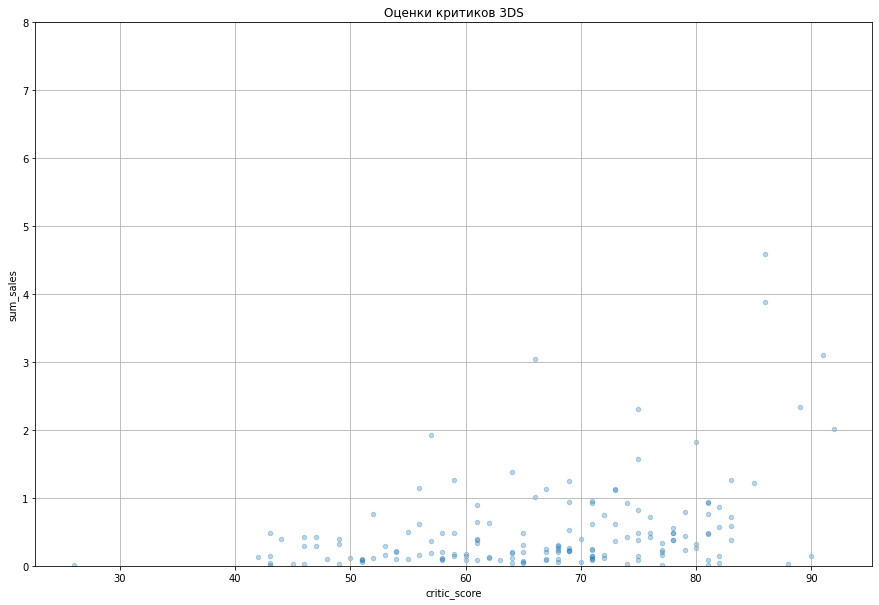

0.22207843643390882
0.3487397305984834


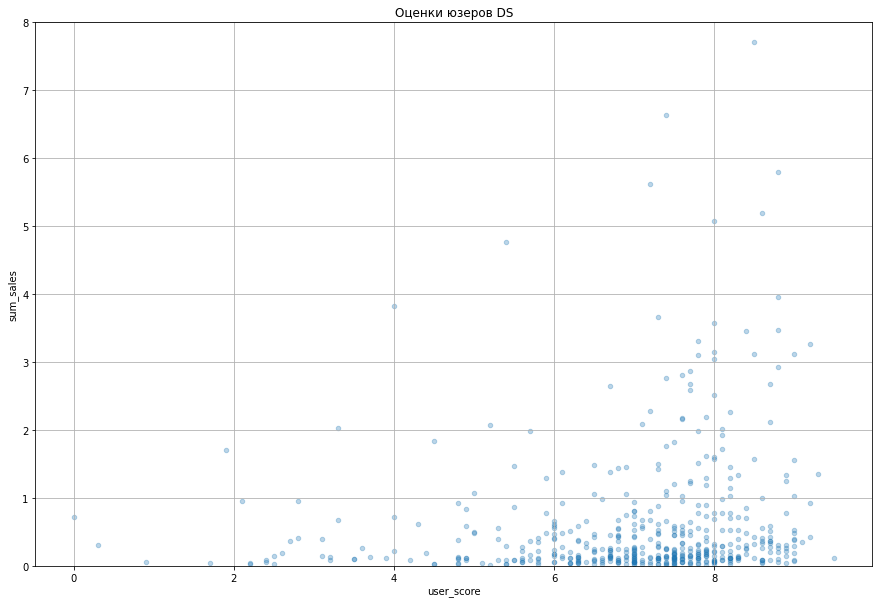

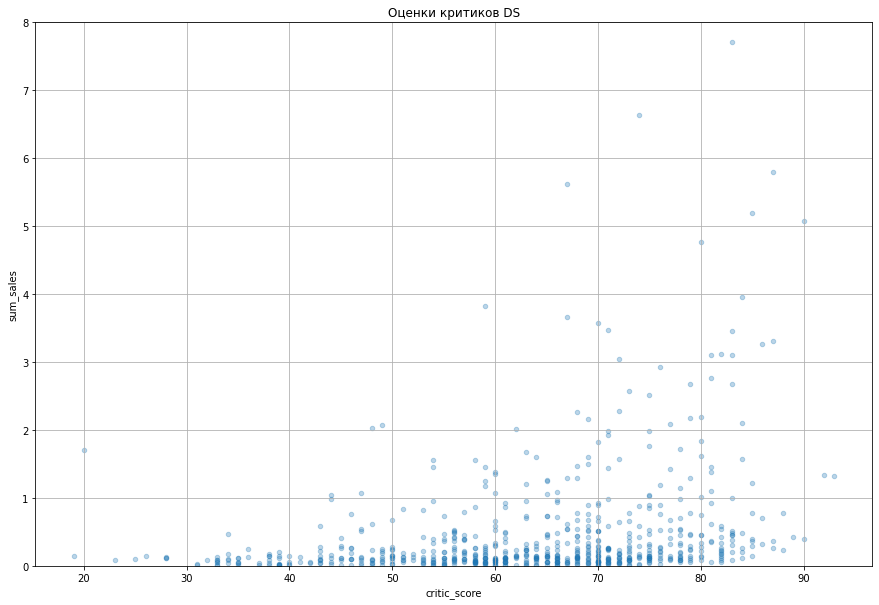

0.13087600975844202
0.23754579854113453


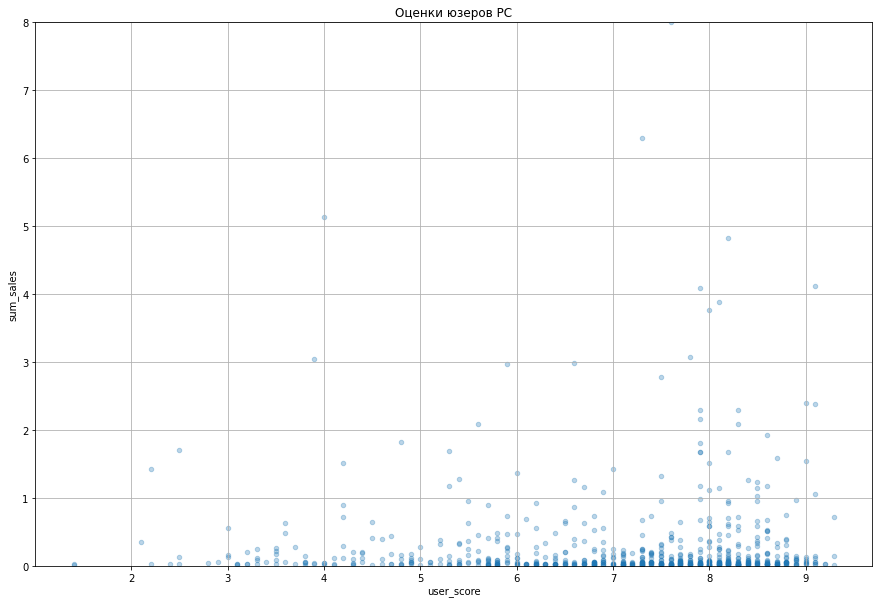

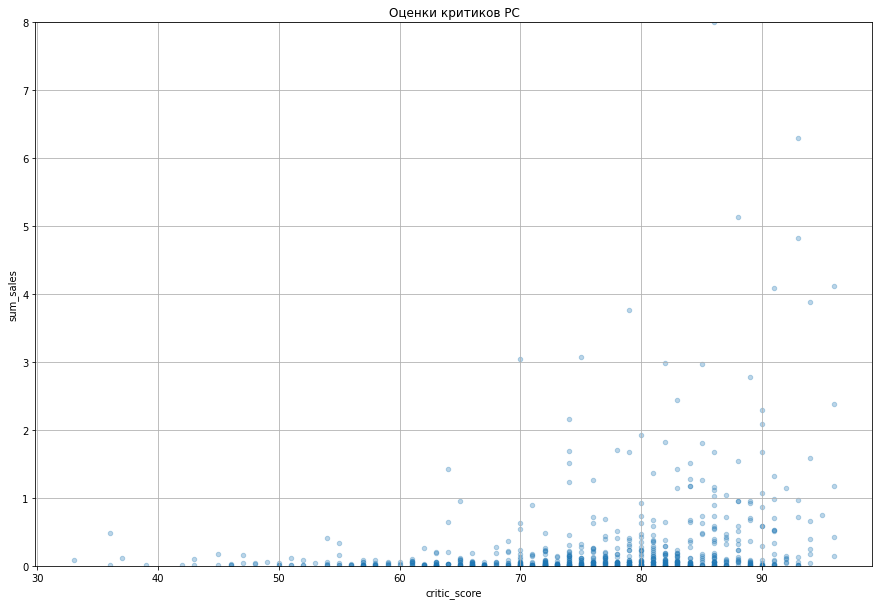

0.012904741611451175
0.257394718400985


In [13]:
for i in ['PS4', 'PS3', 'PS2', 'PS', 'PSP', 'XOne','X360','Wii', '3DS', 'DS','PC']:
    data_base[data_base['platform']== i].plot(x='user_score', y='sum_sales', kind='scatter', alpha=0.3, figsize=(15,10), grid=True)
    plt.ylim(0,8)
    plt.title('Оценки юзеров {}'.format(i))
    plt.show()
    data_base[data_base['platform']== i].plot(x='critic_score', y='sum_sales', kind='scatter', alpha=0.3, figsize=(15,10), grid=True)
    plt.ylim(0,8)
    plt.title('Оценки критиков {}'.format(i))
    plt.show()
    date_plat = data_base[data_base['platform']==i]
    print(date_plat['user_score'].corr(date_plat['sum_sales']))
    print(date_plat['critic_score'].corr(date_plat['sum_sales']))


Можно заметить, что для PS4 отзывы критиков влияют на продажи в определенной степени, это видно на графиках и видно по коэффициенту корреляции. Он примерно равняется 0,4 для зависимости отзывов критиков и продаж. В то же время, завивимости между отзывами покупателей и продажами практически нет, коэффициент около 0. Интересно, что у PS3 появляется небольшая зависимость и от отзывов пользователей, у PS2 она еще немного больше, и у PS еще выше, достигая 0.3. Прослеживается тенденция к все меньшей значимости для продаж отзывов потребителей с течением времени. Скорее всего, маркетинг начинает вносить свою лепту. Интересно, что та же тенденция и у устройств Xbox. Чем новее поколение - тем меньше зависимость от отзывов потребителя, при сохраняющейся заивисмости от отзывов критиков. При этом приставки серий Wii, DS меньше зависят от критиков и больше от пользователей. Продаже на ПК в целом не заивисят от мнения от рейтинга пользователей и слабо зависит от мнений критиков.

9. Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

<StringArray>
[     'Shooter',       'Action', 'Role-Playing',       'Sports',
     'Fighting',         'Misc',   'Simulation',       'Racing',
     'Platform',    'Adventure',       'Puzzle',     'Strategy']
Length: 12, dtype: string

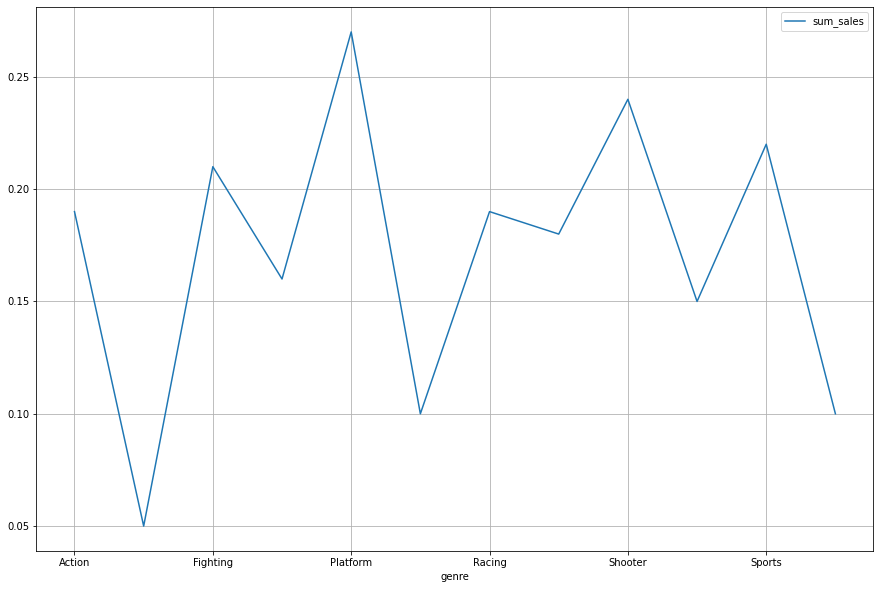

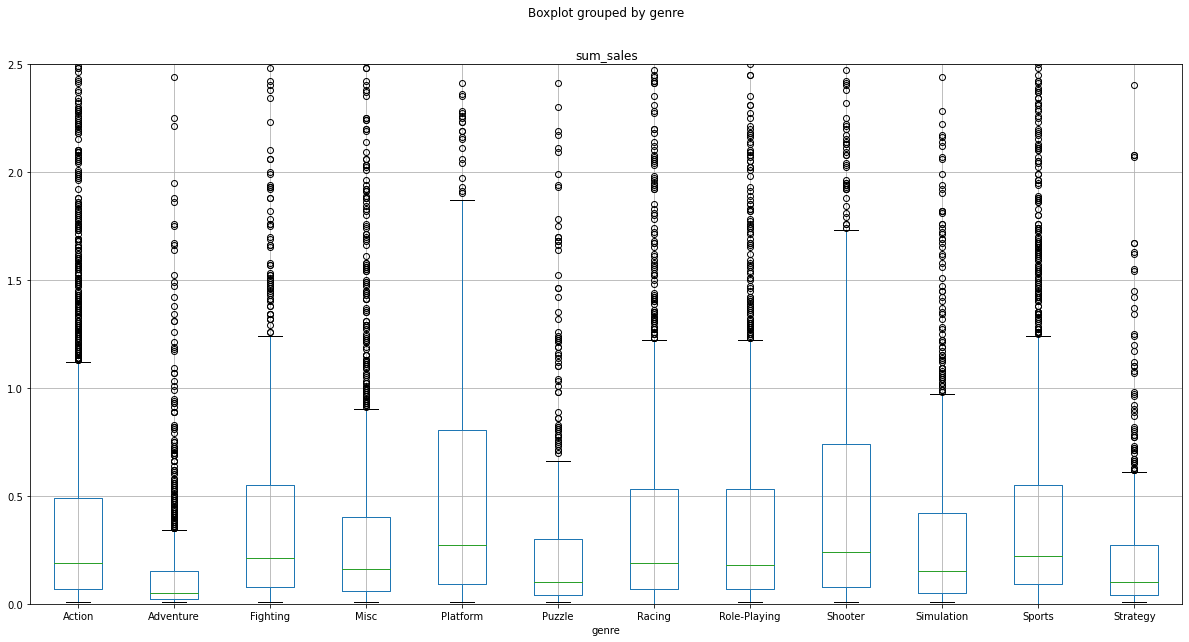

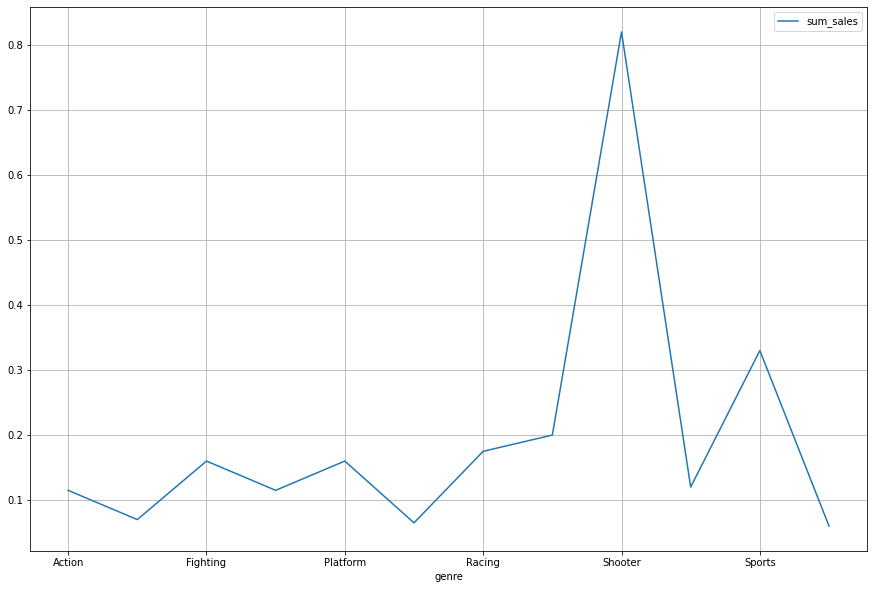

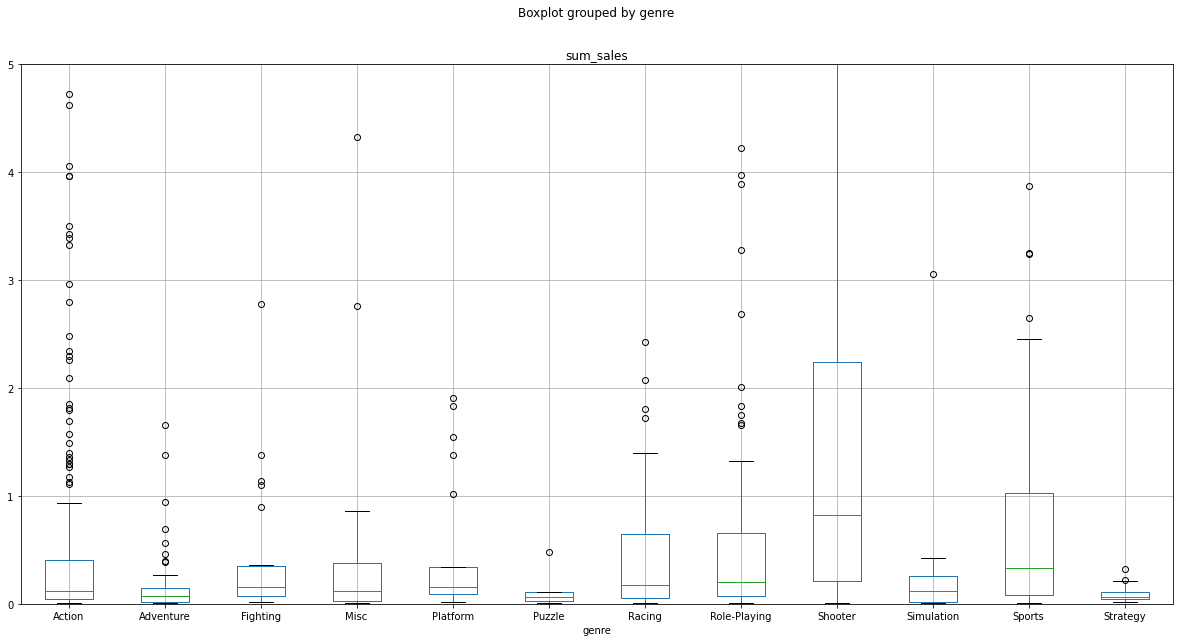

In [14]:
display(data['genre'].unique())
data_genre = data_base.pivot_table(index='genre', values='sum_sales', aggfunc='median')
data_genre.plot(grid=True, figsize=(15, 10))
plt.show()
data_base.boxplot(column='sum_sales', by='genre', figsize=(20,10))
plt.ylim(0,2.5)
plt.show()
#для выборки в 2014-2016гг по популярным платформам
data_genre = data.pivot_table(index='genre', values='sum_sales', aggfunc='median')
data_genre.plot(grid=True, figsize=(15, 10))
plt.show()
data.boxplot(column='sum_sales', by='genre', figsize=(20,10))
plt.ylim(0,5)
plt.show()

Можно заметить, что самые прибыльные жанры - это Platform, Shooter, Sports, Fighting, Racing, Action. В то время, как самые неприбыльные жанры - это Adventure, Puzzle, Strategy, Simulation, Misc. При этом в периоде с 2014 по 2016гг по популярным платформам очень выделяется жанр Shooter. Также Sports и появляется в популярных жанр Role-Playing. Остальные начинают "проседать". Самым стабильным жанром для проноза на 2017 год является Shooter.

## Составьте портрет пользователя каждого региона
Определите для пользователя каждого региона (NA, EU, JP):
1. Самые популярные платформы (топ-5). Опишите различия в долях продаж.

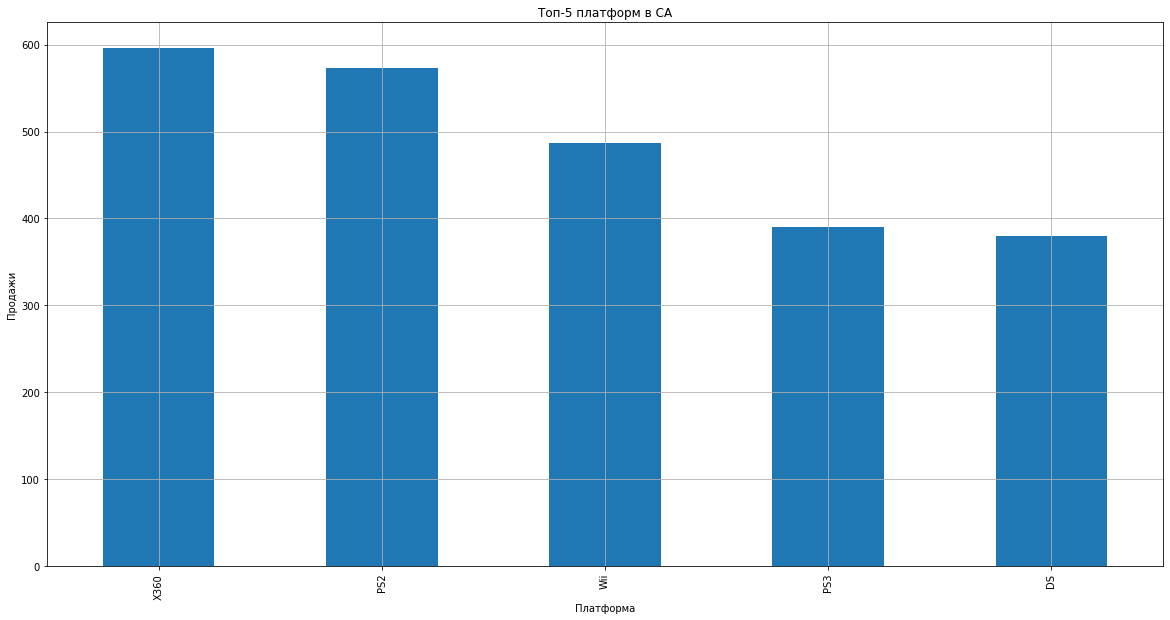

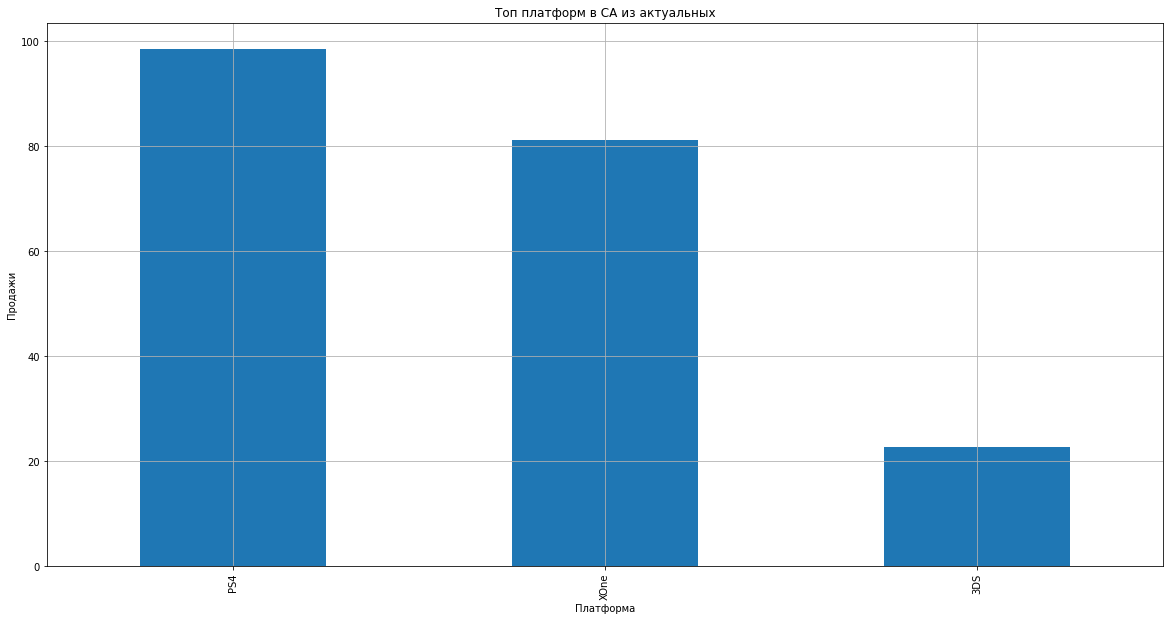

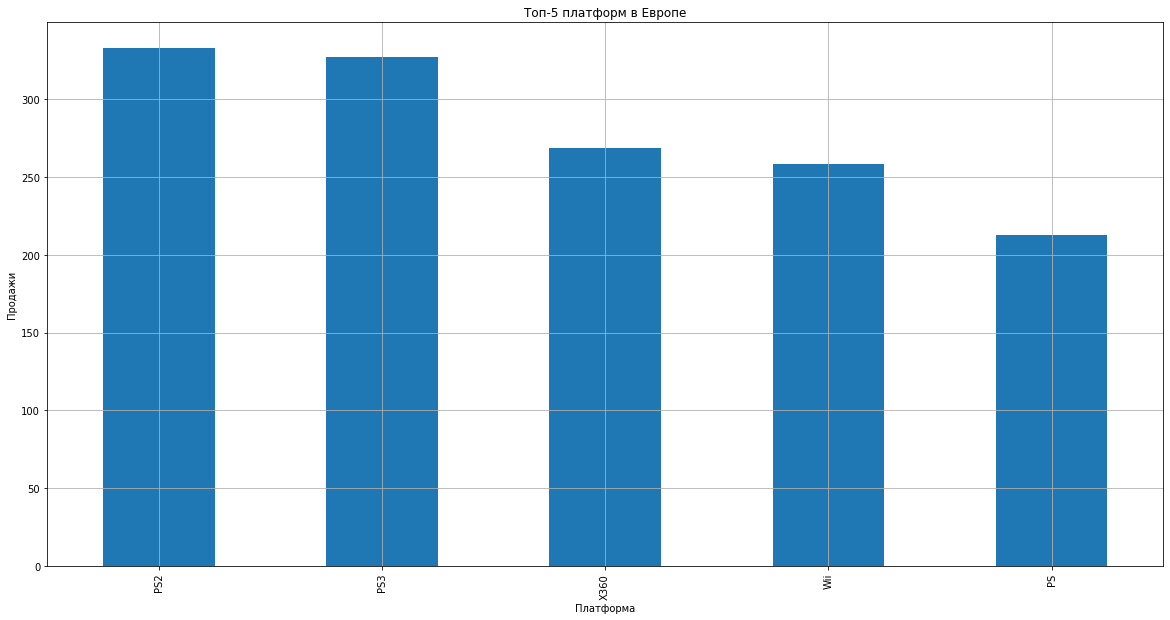

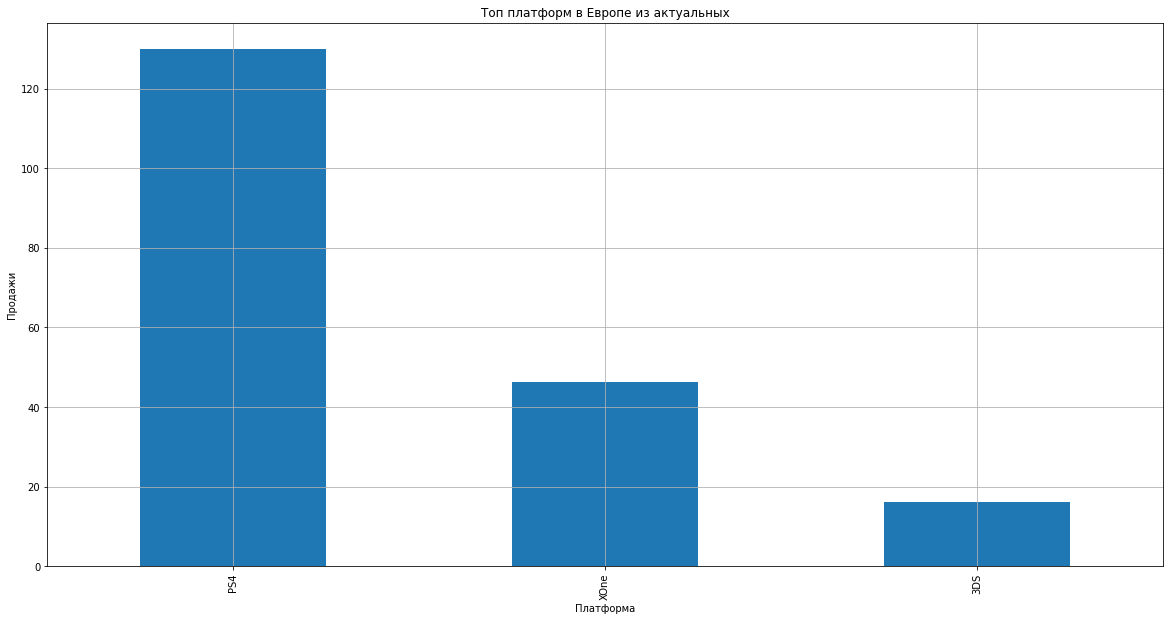

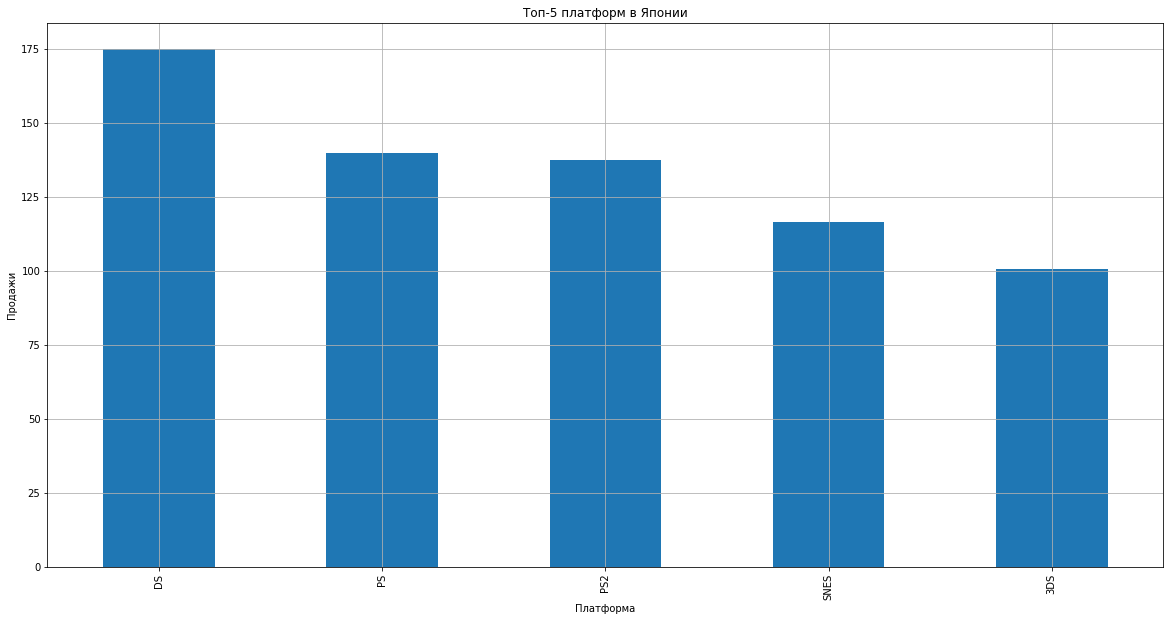

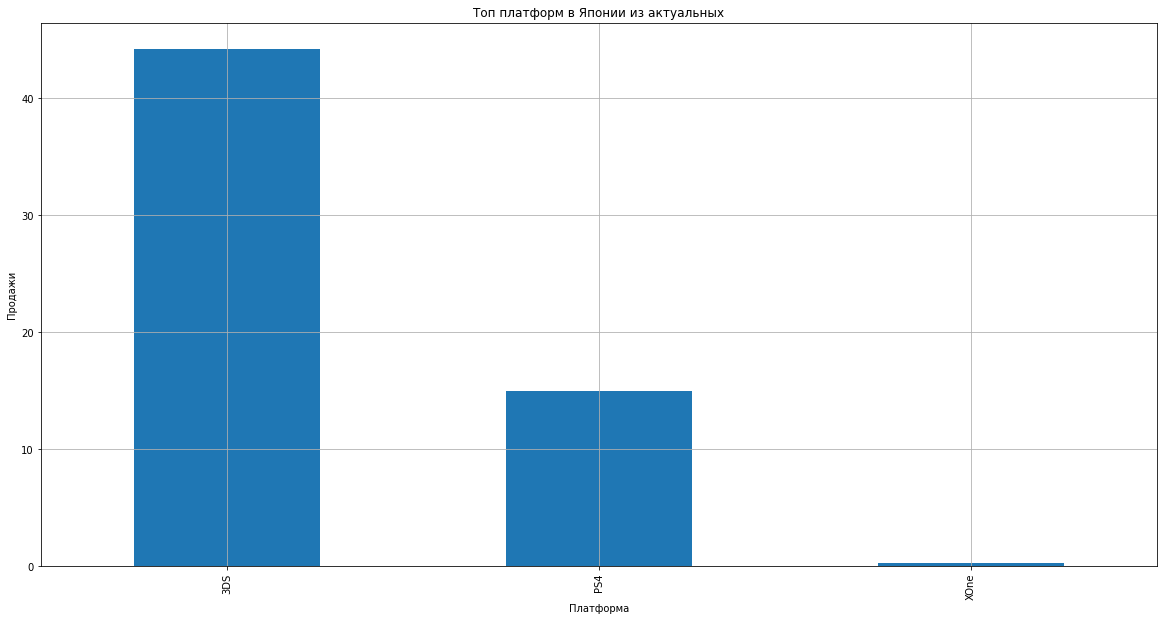

Доля платформ в СА от общей доли платформ platform
3DS     26.119059
PS4     34.221760
XOne    57.901111
dtype: float64
Доля платформ в Европе от общей доли платформ platform
3DS     18.597139
PS4     45.129273
XOne    32.950983
dtype: float64
Доля платформ в Японии от общей доли платформ platform
3DS     51.038302
PS4      5.212563
XOne     0.227985
dtype: float64


In [15]:
#Платформы
#Для СА по всей базе
platform_na = data_base.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
platform_na.plot(x = 'platform', y = 'na_sales', kind = 'bar', figsize=(20,10), grid=True, title = 'Топ-5 платформ в СА')
plt.ylabel('Продажи')
plt.xlabel('Платформа')
plt.show()
#Для СА по актуальной базе (далее с 2014 по 2016 и по популярным приставкам) 
platform_na = data.groupby('platform')['na_sales'].sum().sort_values(ascending=False)
platform_na.plot(x = 'platform', y = 'na_sales', kind = 'bar', figsize=(20,10), grid=True, title = 'Топ платформ в СА из актуальных')
plt.ylabel('Продажи')
plt.xlabel('Платформа')
plt.show()
#Для Европы по всей базе
platform_eu = data_base.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
platform_eu.plot(x = 'platform', y = 'neu_sales', kind = 'bar', figsize=(20,10), grid=True, title = 'Топ-5 платформ в Европе')
plt.ylabel('Продажи')
plt.xlabel('Платформа')
plt.show()
#Для Европы по актуальной базе (далее с 2014 по 2016 и по популярным приставкам) 
platform_eu = data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)
platform_eu.plot(x = 'platform', y = 'eu_sales', kind = 'bar', figsize=(20,10), grid=True, title = 'Топ платформ в Европе из актуальных')
plt.ylabel('Продажи')
plt.xlabel('Платформа')
plt.show()
#Для Японии по всей базе
platform_jp = data_base.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)
platform_jp.plot(x = 'platform', y = 'jp_sales', kind = 'bar', figsize=(20,10), grid=True, title = 'Топ-5 платформ в Японии')
plt.ylabel('Продажи')
plt.xlabel('Платформа')
plt.show()
#Для Японии по актуальной базе (далее с 2014 по 2016 и по популярным приставкам) 
platform_jp = data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)
platform_jp.plot(x = 'platform', y = 'jp_sales', kind = 'bar', figsize=(20,10), grid=True, title = 'Топ платформ в Японии из актуальных')
plt.ylabel('Продажи')
plt.xlabel('Платформа')
plt.show()
#подсчет доли в общей доли платформ
platform_sum_sales = data.groupby('platform')['sum_sales'].sum()
print('Доля платформ в СА от общей доли платформ', platform_na/platform_sum_sales*100)
print('Доля платформ в Европе от общей доли платформ', platform_eu/platform_sum_sales*100)
print('Доля платформ в Японии от общей доли платформ', platform_jp/platform_sum_sales*100)

За все время наблюдений, самыми популярными платформами были PS2, XBOX360 и PS3 - если говорить о СА и Европе, в Японии же DS, PS, PS2. Можно увидеть, что самые популярные консоли в Америке и Европе в годы 2014-2016 - это PS 4, а в Японии - 3DS. При этом, от общей доли PS 4 в мире, 45% в Европе, 34% в СА и 5% в Японии. При этом, доля XOne в США от мировой - почти 58%, в Европе почти 33%, а в Японии доля крайне мала и стремится к нулю. В то время, как доля 3DS в Японии - около 51% от мировой, в СА около 26% и в Европе около 18%.

2. Самые популярные жанры (топ-5). Поясните разницу.

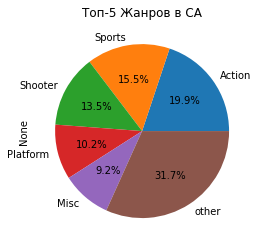

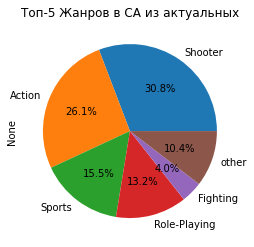

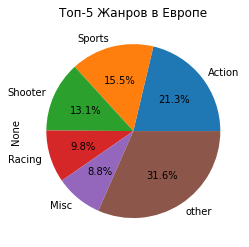

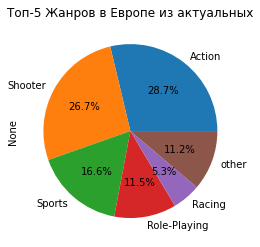

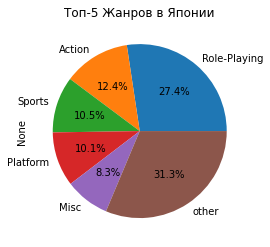

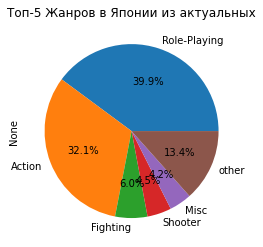

In [16]:
#Жанры
#Для СА по всей базе
genre_na_base = data_base.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
other = data_base['na_sales'].sum() - data_base.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5).sum() 
other = pd.Series([other], index=['other'])
genre_na_base = genre_na_base.append(other)
genre_na_base.plot(kind = 'pie', autopct='%1.1f%%', grid=True, title = 'Топ-5 Жанров в СА')
plt.show()
#Для СА по актуальной базе (далее с 2014 по 2016 и по популярным жанрам) 
genre_na = data.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
other = data['na_sales'].sum() - data.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5).sum() 
other = pd.Series([other], index=['other'])
genre_na = genre_na.append(other)
genre_na.plot(kind = 'pie', autopct='%1.1f%%', grid=True, title = 'Топ-5 Жанров в СА из актуальных')
plt.show()
#Для Европы по всей базе
genre_eu_base = data_base.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
other = data_base['eu_sales'].sum() - data_base.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5).sum() 
other = pd.Series([other], index=['other'])
genre_eu_base = genre_eu_base.append(other)
genre_eu_base.plot(kind = 'pie', autopct='%1.1f%%', grid=True, title = 'Топ-5 Жанров в Европе')
plt.show()
#Для Европы по актуальной базе (далее с 2014 по 2016 и по популярным жанрам) 
genre_eu = data.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
other = data['eu_sales'].sum() - data.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5).sum() 
other = pd.Series([other], index=['other'])
genre_eu = genre_eu.append(other)
genre_eu.plot(kind = 'pie', autopct='%1.1f%%', grid=True, title = 'Топ-5 Жанров в Европе из актуальных')
plt.show()
#Для Японии по всей базе
genre_jp_base = data_base.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)
other = data_base['jp_sales'].sum() - data_base.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5).sum() 
other = pd.Series([other], index=['other'])
genre_jp_base = genre_jp_base.append(other)
genre_jp_base.plot(kind = 'pie', autopct='%1.1f%%', grid=True, title = 'Топ-5 Жанров в Японии')
plt.show()
#Для Японии по актуальной базе (далее с 2014 по 2016 и по популярным жанрам) 
genre_jp = data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)
other = data['jp_sales'].sum() - data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5).sum() 
other = pd.Series([other], index=['other'])
genre_jp = genre_jp.append(other)
genre_jp.plot(kind = 'pie', autopct='%1.1f%%', grid=True, title = 'Топ-5 Жанров в Японии из актуальных')
plt.show()


Видно, что наиболее популярные жанры в СА и Европе практически совпадают. При этом за все время потерял позии Srorts, в то время, как Shooter сделал большой шан вперед. В наше время, Shooter+Action забирают на себя более 50%, далее Sports и Role-playing еще 27-28%. Далее на 5 месте в СА Fighting - около 4%, а в Европе - Racing, около 5%. При этом в Японии совершенно другой результат. За все время наблюдений первые 2 позиции стабильный - это Role-Playing и Action. Sports также растерял позиции. В наше время на 1 месте с большим отрывом Role-Playing - почти 40%, далее Action - около 32%, остльные жанры получают сильно меньше. Можно сделать вывод, что Action - один из наиболее популярных жанров во всех исследуемых регионах. При это остальные жанры в Японии и остальном мире имеют абсолютно разную статистику.


3. Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Рассматриваем зависимость от рейтинга для популярных платформ в 2014-2016гг
unrated    333
M          140
T          139
E          113
E10+        91
Name: rating, dtype: Int64


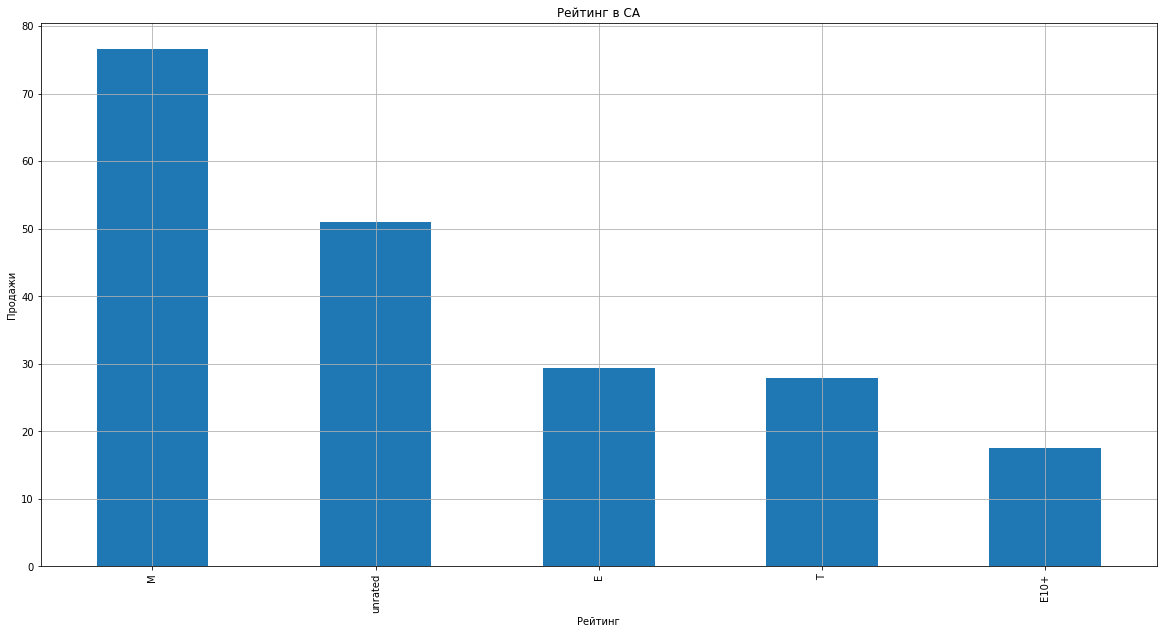

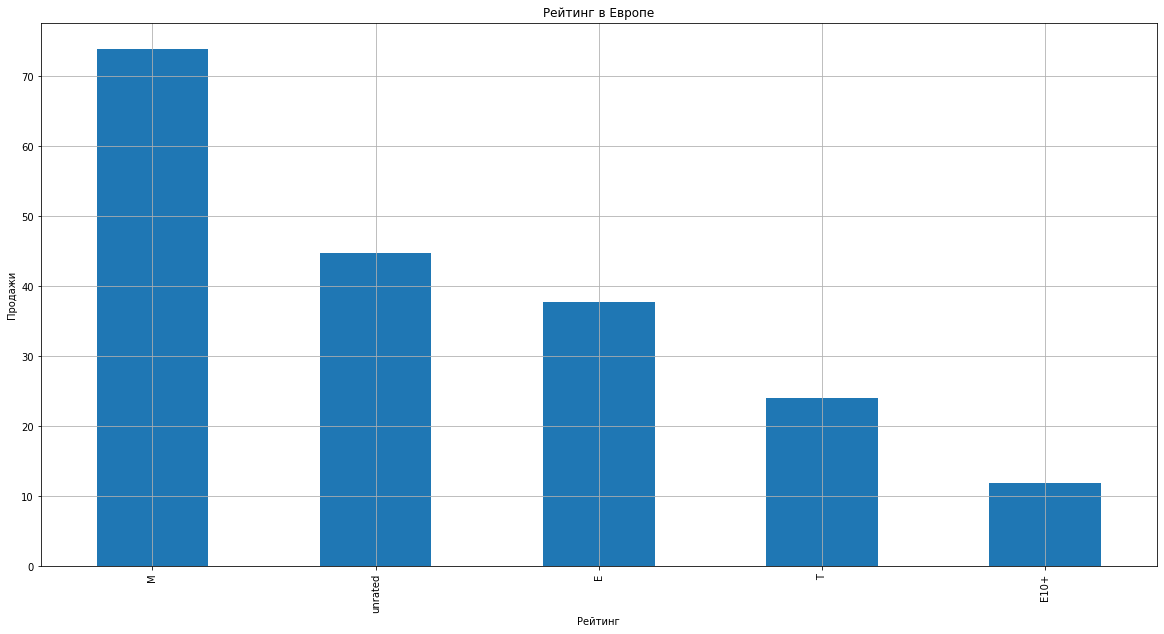

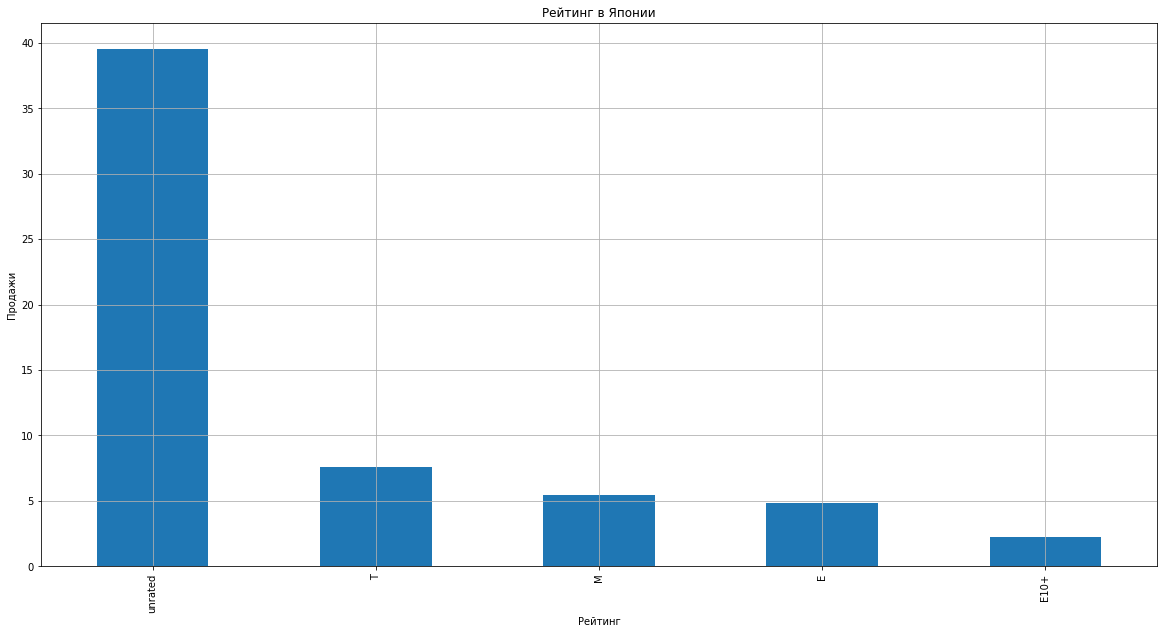

In [18]:
print('Рассматриваем зависимость от рейтинга для популярных платформ в 2014-2016гг')
data['rating'].fillna('-1')
print(data['rating'].value_counts())
rating_na = data.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
rating_na.plot(x = 'rating', y = 'na_sales', kind = 'bar', figsize=(20,10), grid=True, title = 'Рейтинг в СА')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи')
plt.show()
rating_eu = data.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
rating_eu.plot(x = 'rating', y = 'eu_sales', kind = 'bar', figsize=(20,10), grid=True, title = 'Рейтинг в Европе')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи')
plt.show()
rating_jp = data.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)
rating_jp.plot(x = 'rating', y = 'jp_sales', kind = 'bar', figsize=(20,10), grid=True, title = 'Рейтинг в Японии')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи')
plt.show()

In [19]:
# Комментарий ревьюера
temp = data.copy()
print(temp.rating.isna().sum(), temp.rating.isna().sum()/len(temp))
temp.rating.value_counts()

0 0.0


unrated    333
M          140
T          139
E          113
E10+        91
Name: rating, dtype: Int64

Рейтинг влияет на продажи в СА и Европе, но не в Японии. Видно, что в СА самые популярные игры с рейтингом М - для взрослых. Далее следуют игры без рейтинга. Далее Е - для всех и Т - от 13 лет почти поровну. Меньше всех игр Е10+ - от 10 лет. Вероятно, их в целом рейтингуют так меньше остальных, чаще давая Е или Т.
Европа практически повторяет группировку по СА, кроме того, то в Европе рейтинг Е встречается чаще, чем Т. В Японии ситуация совершенно иная. Подавляющее большинство игр не имеет рейтинга. Из тех, что имеют, лучшие по рейтингом Т - от 13 лет. Далее М - для взрослых, далее Е и Е10+. Интересно, что игры с рейтингом Т, наиболее популярные в Японии из тех, что имеют рейтинг - в США и Европе идут лишь на 4 месте по продажам. По всем исследованиям заметно, как сильно отличается японский рынок от СА и Европейского. Вероятно, разница в том числе связана с предпочтениями по жанрам. Чаще Шутинг и Экшн будет иметь взрослый рейтинг, чем ролевая игра. Это и отражается в статистике по жанрам в разных регионах.

## Проверка гипотез
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
Стоит анализировать данные в общей выборке, учитывая, что персональный компьютер существует давно и у него нет яркого пика популярности игр. Нулевая гипотеза - средние рейтинги по платформам одинаковые, альтернативная - рейтинги разные. 

In [20]:
data_base = data_base.query("year_of_release >= 2014 and year_of_release <= 2016")
data_base = data_base[data_base['user_score'].notna()]
data_XOne = data_base[data_base['platform'] == 'XOne']
data_pc = data_base[data_base['platform'] == 'PC']
XOne = data_XOne['user_score']
PC = data_pc['user_score']
alpha = .05
results = st.ttest_ind(XOne, PC)
print('p-value:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-value: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


Необходимо убрать пропуски. Затем выделяем отдельные датафреймы по необходимым платформам. В них выделяем столбцы с пользовательскими рейтингами. Выставляем значение альфа как 0.05 (общепринятое значение). Значение p-value больше alpha, поэтому нулевая гипотеза не отвергается. Следовательно, рейтинги на этих платформах сопоставимы.

2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
Стоит анализировать данные в нашей выборке за 2014-2016 год , они будут более показательны и актуальны. Нулевая гипотеза - средние рейтинги по жанрам одинаковые, альтернативная - рейтинги разные. 

In [22]:

data_base = data_base[data_base['user_score'].notna()]
data_action = data_base[data_base['genre'] == 'Action']
data_sports = data_base[data_base['genre'] == 'Sports']
action = data_action['user_score']
sports = data_sports['user_score']
alpha = .05
results = st.ttest_ind(action, sports)
print('p-value: ', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 
print(data_base.groupby('platform')['user_score'].mean().sort_values(ascending=False))
print(data_base.groupby('genre')['user_score'].mean().sort_values(ascending=False))

p-value:  2.8711147985105864e-19
Отвергаем нулевую гипотезу
platform
PSV     7.656164
3DS     7.138182
WiiU    7.087500
PS4     6.828099
XOne    6.594545
Wii     6.350000
PC      6.298361
PS3     6.014286
X360    5.771084
Name: user_score, dtype: float64
genre
Puzzle          7.975000
Adventure       7.470213
Role-Playing    7.348571
Strategy        7.216667
Fighting        6.983784
Misc            6.968293
Action          6.760606
Platform        6.741379
Shooter         6.549074
Simulation      6.504167
Racing          6.327451
Sports          5.225197
Name: user_score, dtype: float64


Необходимо убрать пропуски. Затем выделяем отдельные датафреймы по необходимым жанрам. В них выделяем столбцы с пользовательскими рейтингами. Выставляем значение альфа как 0.05 (общепринятое значение). Значение p-value меньше alpha, поэтому нулевая гипотеза отвергается. Следовательно, рейтинги по этим жанрам разные. По средним показателям видно, что рейтинг платформ PC и XOne (6.298361 и 6.594545) действительно близок. В то время, как средние рейтинги жанров Sports и Action (5.225197 и 6.760606) значительно отличаются. Что подтверждает наши проверки гипотез.

## Вывод
Была проделана работа над базой данных по компьютерным играм. Были устранены пропуски, таблица приведена к более читабельному виду. Более подробно об этом написано в выводах к 1 главе. Затем был осуществлен исследовательский анализ даннных. Были определены средние пики популярности по разным платформам, тенденция по количеству игр по разным периодам. Также были определены наиболее удачные платформы в последние 3 года. Ими стали PS4, XboxOne и 3DS. При этом наиболее популярна в мире PS4 в последние годы. Но в Японии это 3DS. Также выявлены доли разных платформ по странам, доли жанров, наиболее и наименее популярные жанры в разных странах. Кроме того, был дан ответ на вопрос о наличии заивисимости отзывов на игры от критиков и пользователей на продажи. Был описан портрет среднего пользователя в разных регионах. Чаще всего, в 2017 году это будет пользователь PS4, предпочитающий Shooting/Action со взрослым возрастным рейтпнгом из СА или Европы. При этом в Японии это будет скорее пользователь 3DS, который предпочитает ролевые игры.
Также были проверены 2 гипотезы, по результатам проверок которых можно сделать выводы, что у игр PC и XBox One средние рейтинги близки, в то время, как у жанров Спорт и Экшн значительно отличаются. В 2017 году следует разрабатывать Action со взрослым рейтингом на PS4 или Xbox one для СА или Европы, при этом больше внимания уделить отзывам критиков, не уделяя